In [ ]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import torch
import numpy as np
from tool.model import Unet
from tool.evaluate import *

In [ ]:
model = Unet().to('cuda')

In [ ]:
inputs = torch.Tensor(np.load('inputs.npy')).to('cuda')
labels = np.load('outputs.npy')

In [ ]:
inputs_test = torch.Tensor(np.load('inputs_test.npy')).to('cuda')
labels_test = np.load('outputs_test.npy')

In [ ]:
checkpoint = torch.load('model_piunet_opt_b3_elr/model_10001.pt')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

Unet(
  (maxpool): MaxPool3d(kernel_size=(2, 2, 1), stride=(2, 2, 1), padding=0, dilation=1, ceil_mode=False)
  (encoder1): Sequential(
    (0): Conv3d(1, 32, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(32, 64, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (3): ReLU()
  )
  (encoder2): Sequential(
    (0): Conv3d(64, 64, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(64, 128, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (3): ReLU()
  )
  (encoder3): Sequential(
    (0): Conv3d(128, 128, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(128, 256, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (3): ReLU()
  )
  (encoder4): Sequential(
    (0): Conv3d(256, 256, kernel_size=(2, 2, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(256, 512, kernel_size=(3, 3, 1), stride=(1, 1, 1), p

In [ ]:
idx = 0

In [ ]:
b_norm = 2500

In [ ]:
b = model(torch.permute(inputs[idx, ...], (3, 2, 1, 0))[None, ...])*b_norm
b = b.cpu().detach().numpy().squeeze().transpose(2, 1, 0, 3)

B = labels[idx, ...]*b_norm
B = B.transpose(1, 2, 3, 0)

In [ ]:
b.shape, B.shape

((513, 257, 50, 3), (513, 257, 50, 3))

In [ ]:
b_test = model(torch.permute(inputs_test[idx, ...], (3, 2, 1, 0))[None, ...])*b_norm
b_test = b_test.cpu().detach().numpy().squeeze().transpose(2, 1, 0, 3)

B_test = labels_test[idx, ...]*b_norm
B_test = B_test.transpose(1, 2, 3, 0)

In [ ]:
# z=0을 50개 쌓아서 model magnetic field라고 놓았을 때
bb = np.tile(B[..., 0, :][:, :, None, :], (1, 1, 50, 1))
bb.shape

(513, 257, 50, 3)

{'c_vec': 0.59247726, 'c_cs': 0.19613248154974552, 'c_cs_ep': 0.19613248154974552, "E_n'": -1.298461675643921, "E_m'": -2.5517800987553185, "E_m'_ep": -2.5517800987553185, 'eps': 6.8893075}


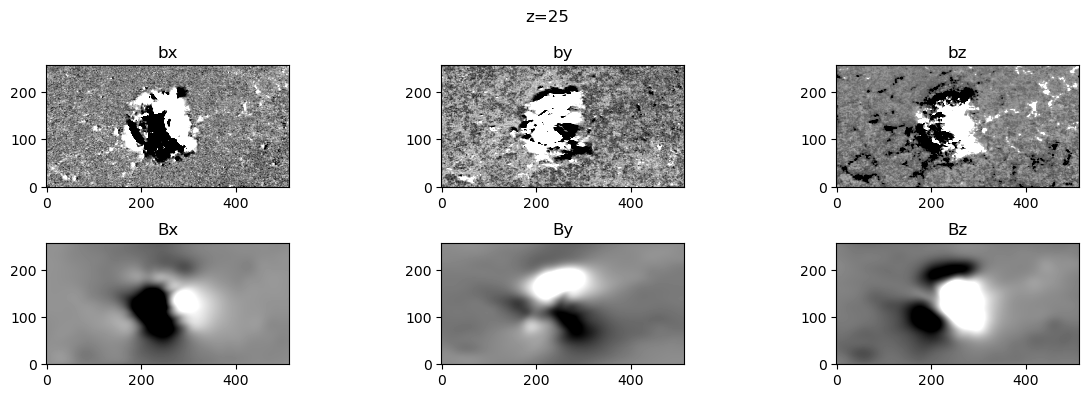

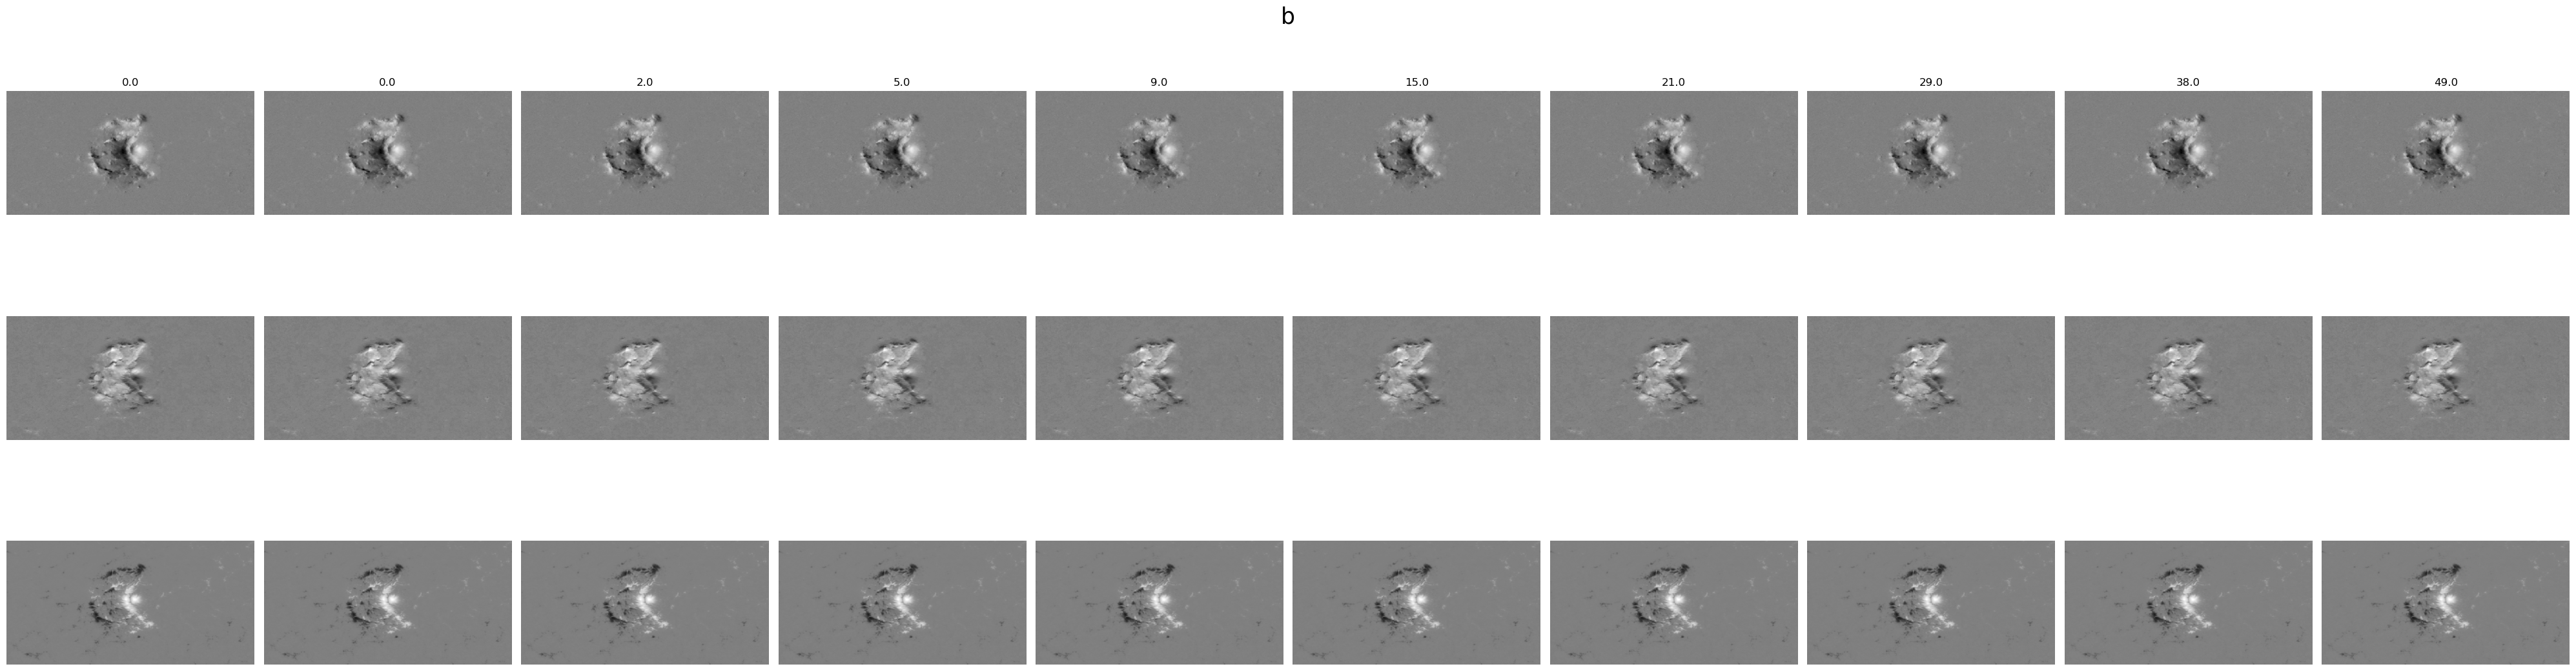

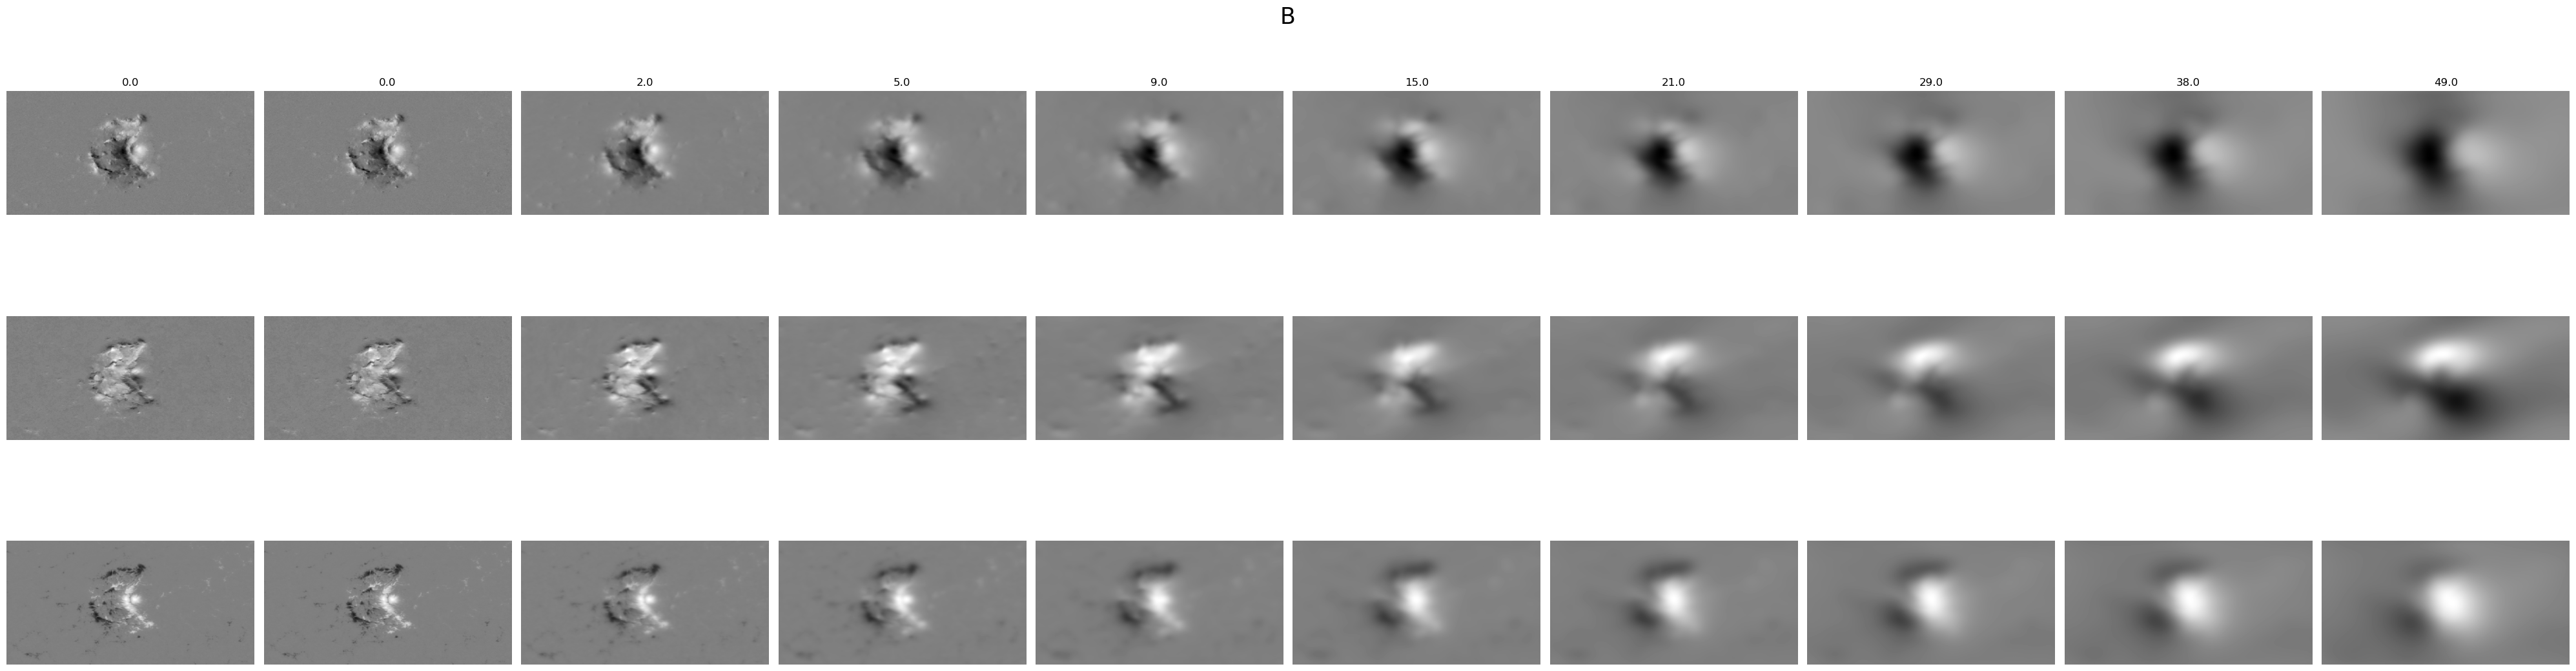

In [ ]:
print(metric(bb, B))
plot_overview(bb, B, z=25, b_norm=100)
plot_sample(bb, B)

{'c_vec': 0.9558782, 'c_cs': 9.452062408507217, 'c_cs_ep': 0.5059115904764071, "E_n'": 0.5083108842372894, "E_m'": 0.12684817317829822, "E_m'_ep": -366051.88610857015, 'eps': 1.0800827}


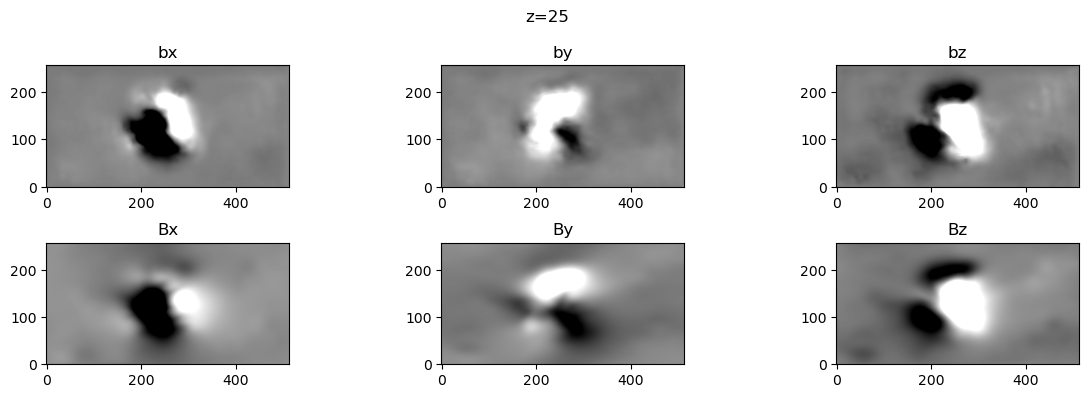

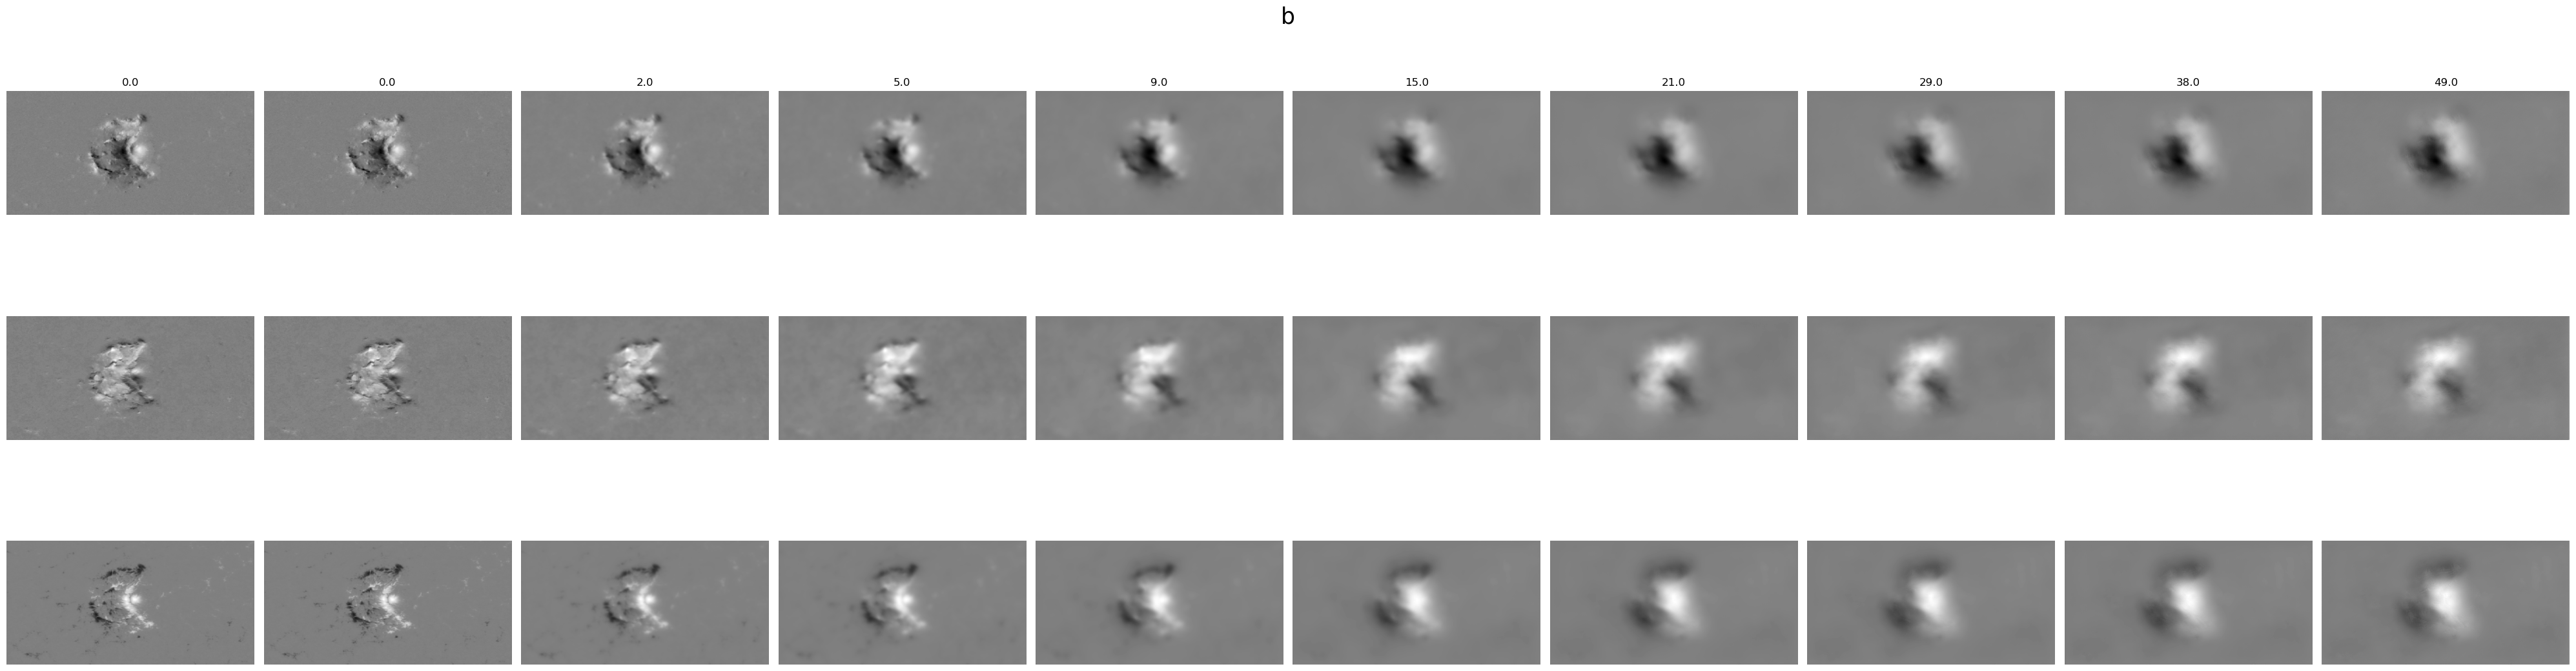

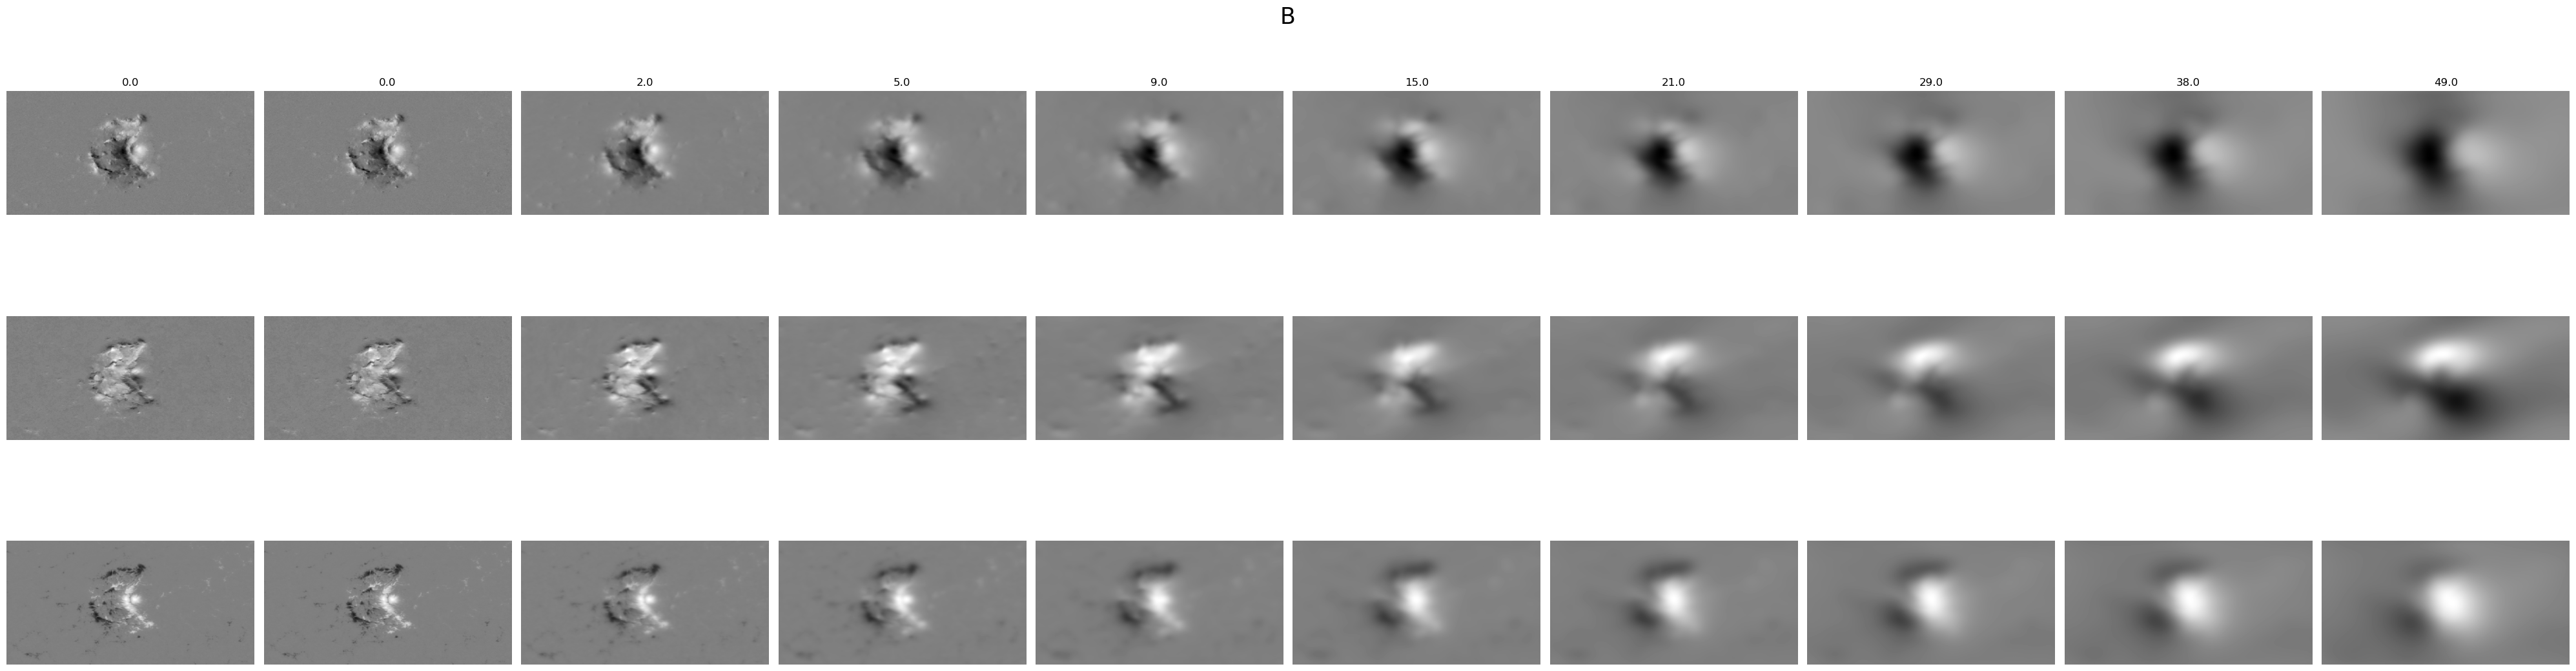

In [ ]:
print(metric(b, B))
plot_overview(b, B, z=25, b_norm=100)
plot_sample(b, B)

{'c_vec': 0.9321717, 'c_cs': 0.4295011036020661, 'c_cs_ep': 0.3691865580509856, "E_n'": 0.46120214462280273, "E_m'": -7.659345727050006, "E_m'_ep": -363078.96823082346, 'eps': 0.9189817}


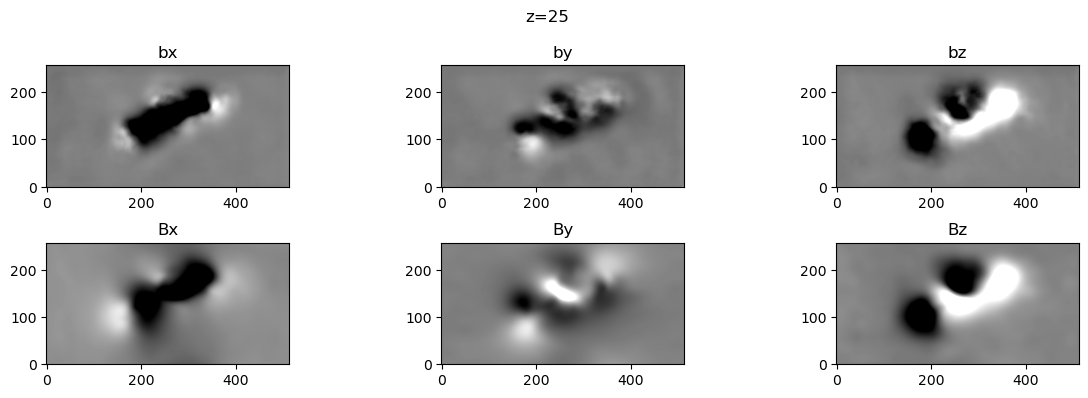

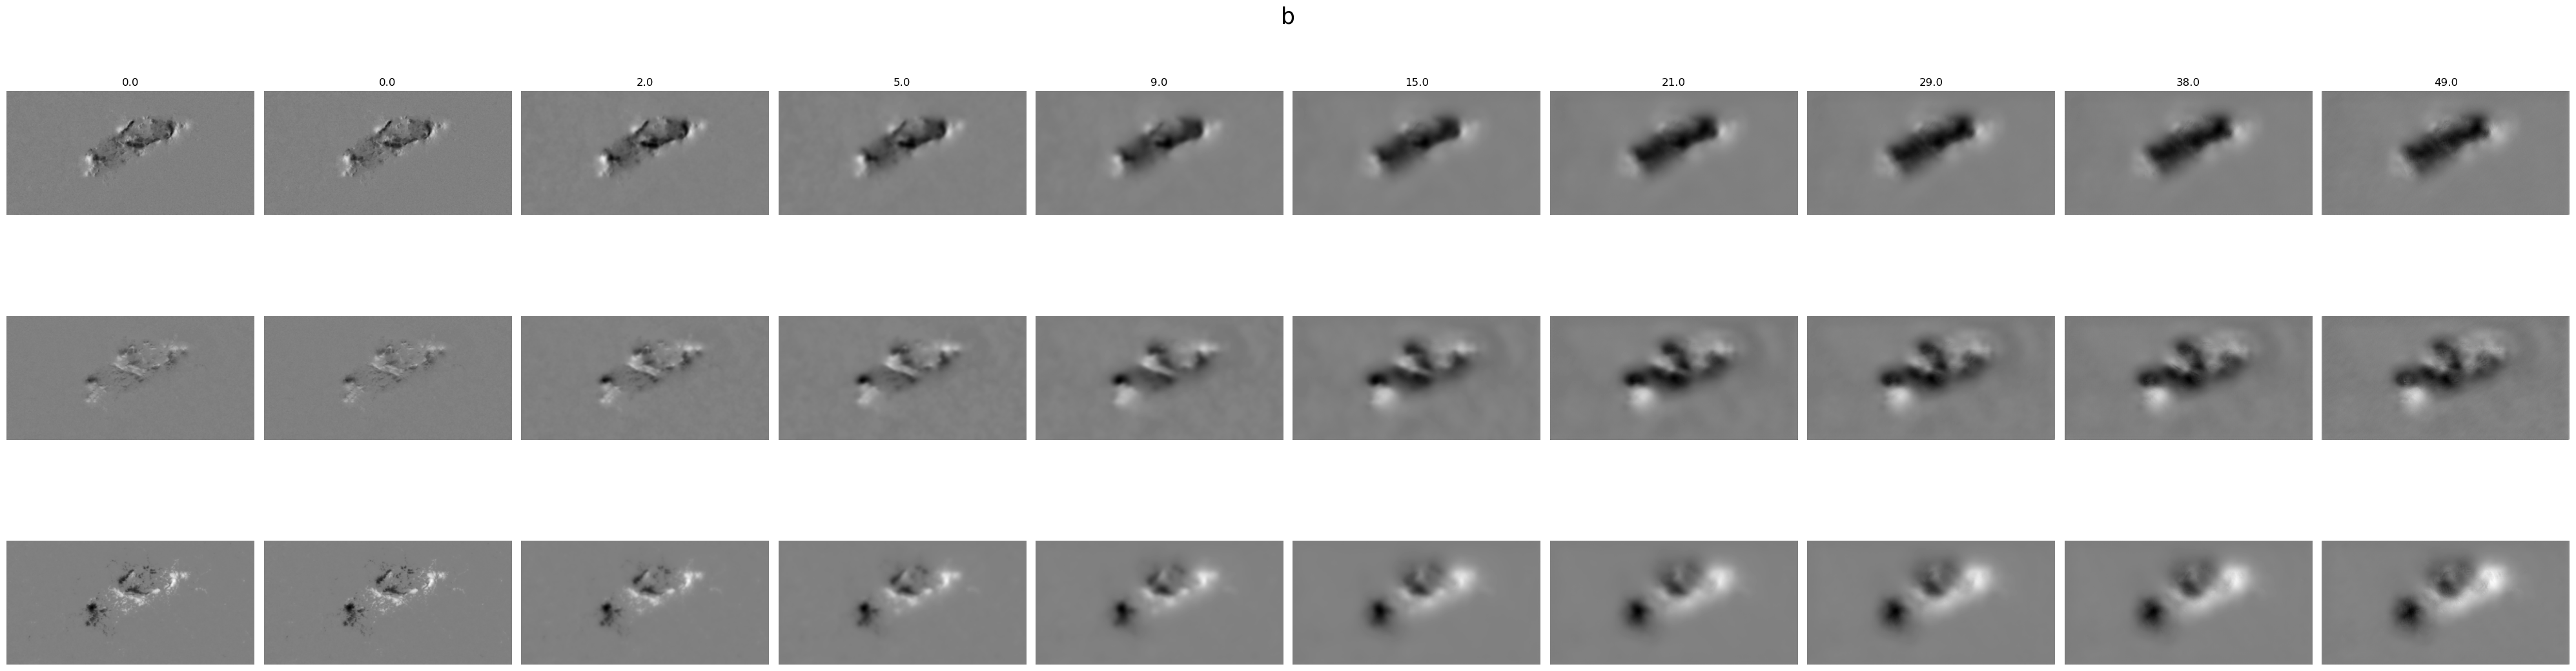

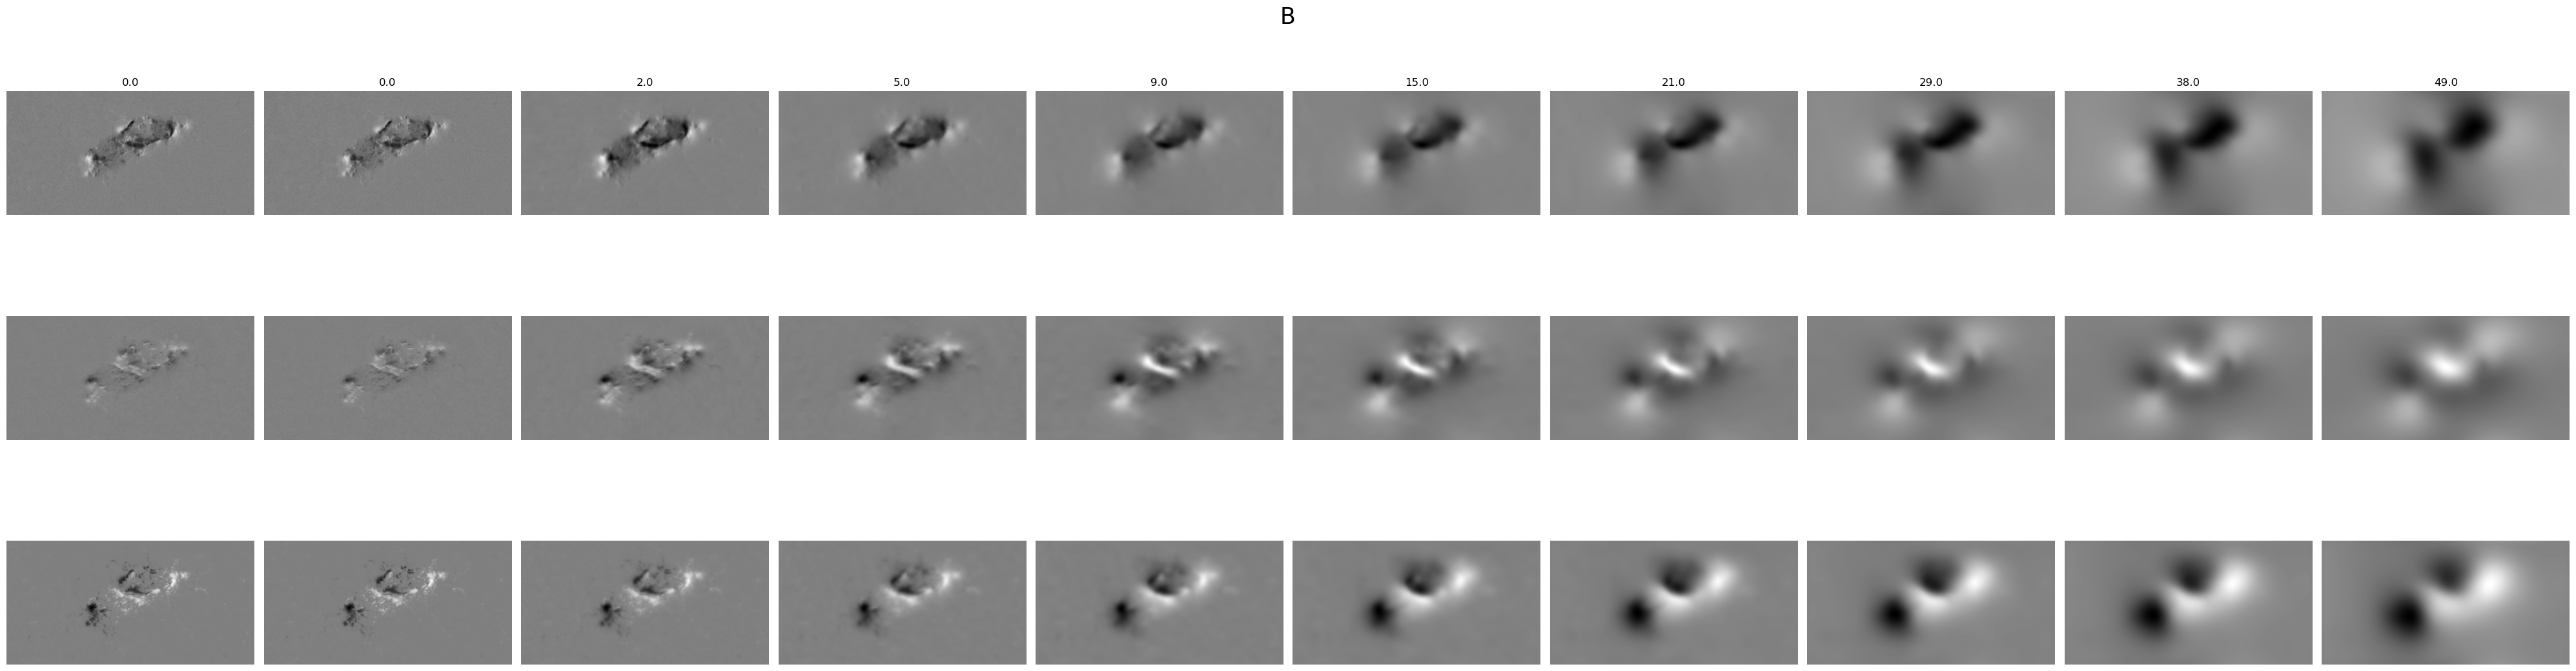

In [ ]:
print(metric(b_test, B_test))
plot_overview(b_test, B_test, z=25, b_norm=100)
plot_sample(b_test, B_test)

In [ ]:
inputs_tes = torch.Tensor(np.load('12673_20170906_083600_input.npy')).to('cuda')
labels_tes = np.load('12673_20170906_083600_output.npy')

In [ ]:
b_tes = model(torch.permute(inputs_tes, (3, 2, 1, 0))[None, ...])*b_norm
b_tes = b_tes.cpu().detach().numpy().squeeze().transpose(2, 1, 0, 3)

B_tes = labels_tes*b_norm
B_tes = B_tes.transpose(1, 2, 3, 0)

{'c_vec': 0.9394243361437364, 'c_cs': 1.407766552214485e+42, 'c_cs_ep': 0.5170159517366179, "E_n'": 0.5128113922878066, "E_m'": 0.20219074711093443, "E_m'_ep": -386106.56505486387, 'eps': 0.9408365196974704}


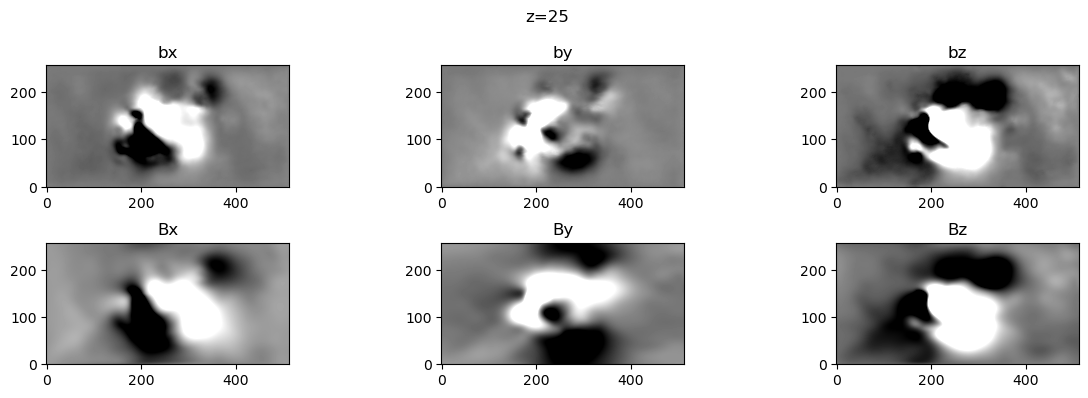

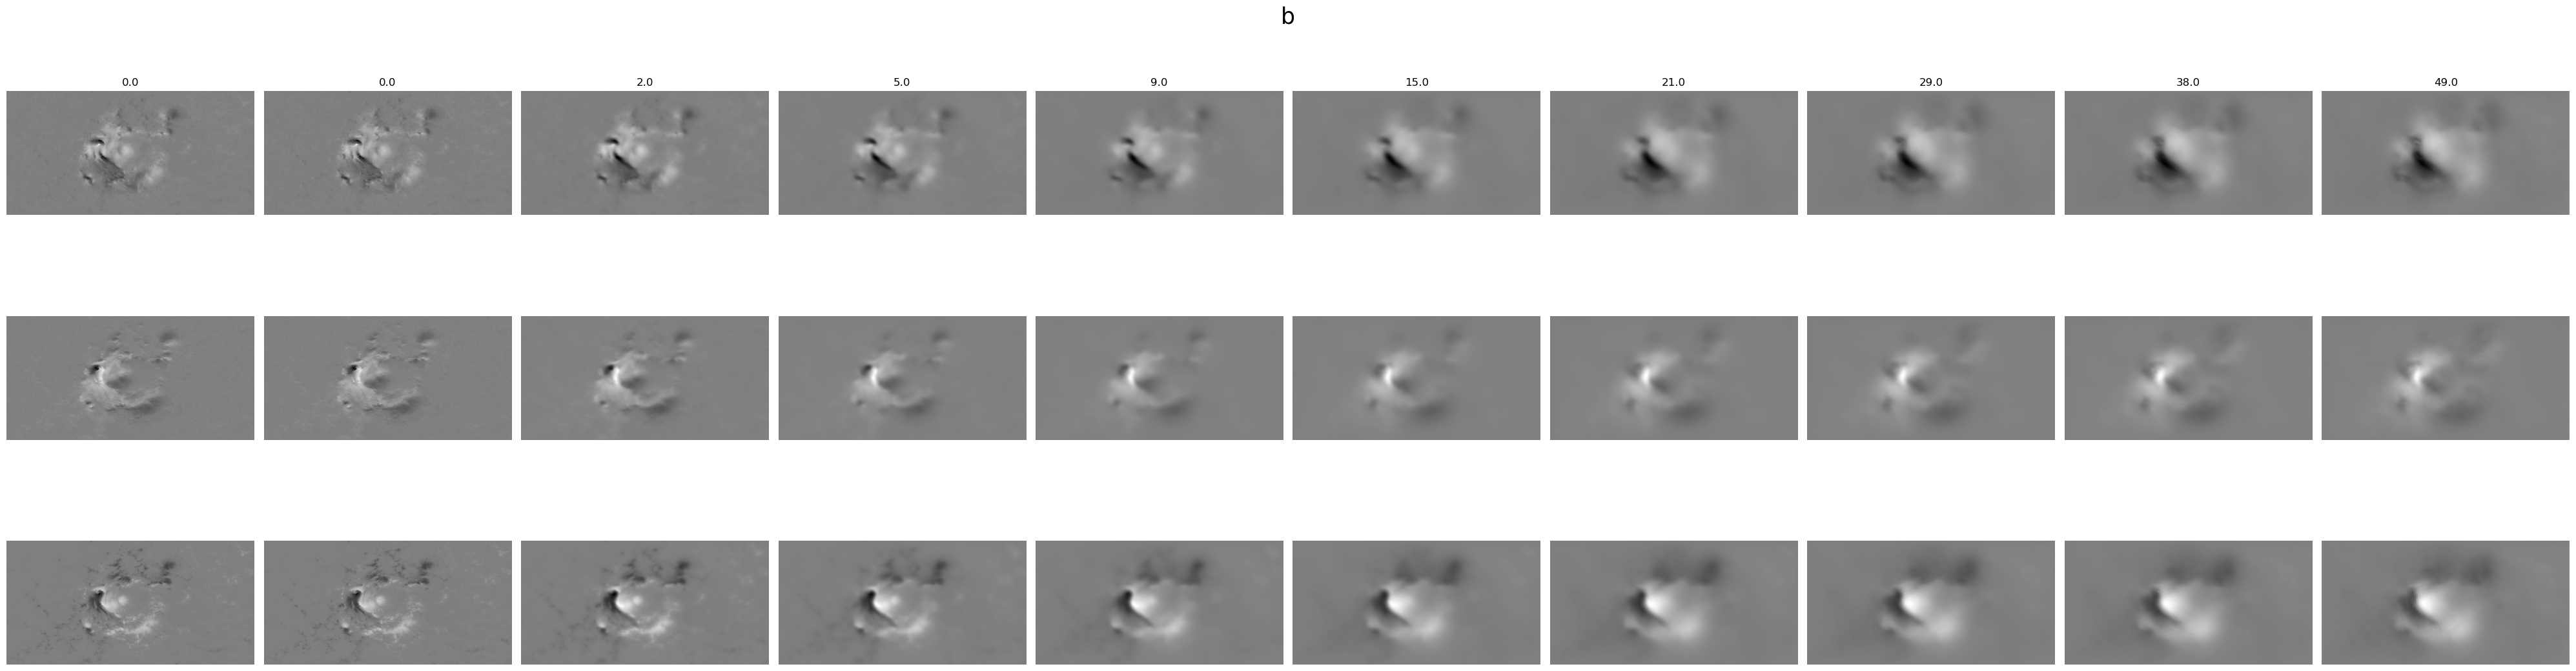

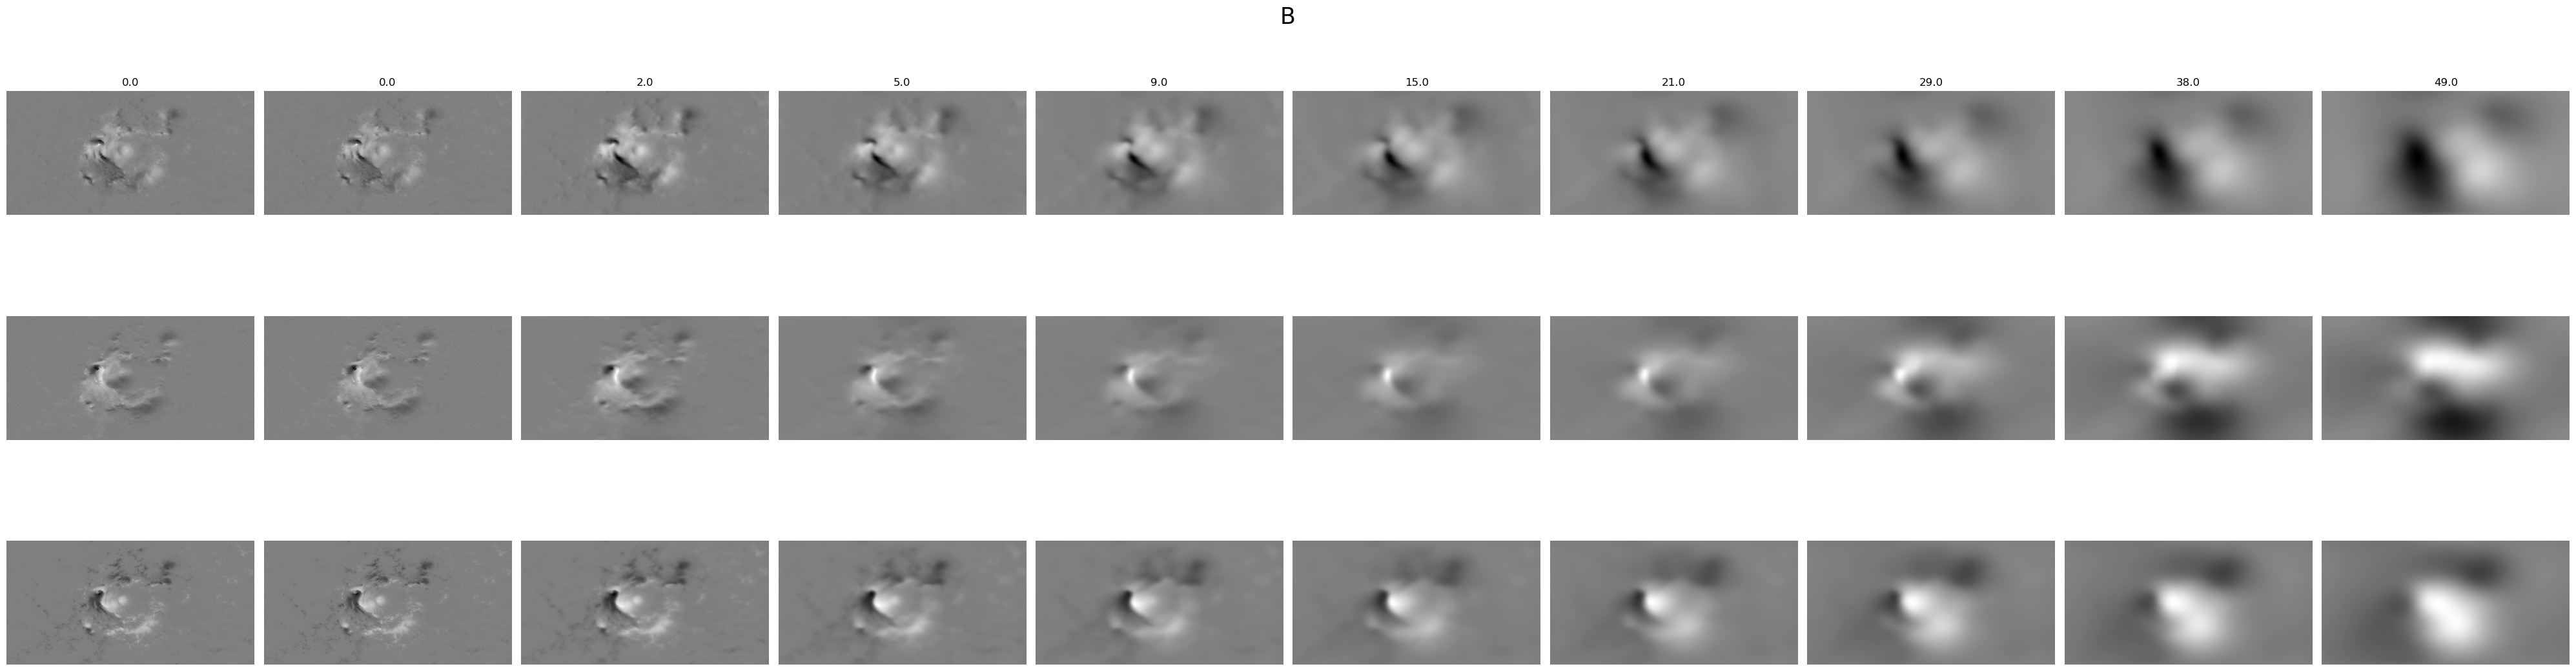

In [ ]:
print(metric(b_tes, B_tes))
plot_overview(b_tes, B_tes, z=25, b_norm=100)
plot_sample(b_tes, B_tes)